<a href="https://colab.research.google.com/github/PrithiviRajMK/ScalerProjects/blob/main/OLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OLA
### Problem Statement

Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

You are working as a data scientist with the Analytics Department of Ola, focused on driver team attrition. You are provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes like

Demographics (city, age, gender etc.)
Tenure information (joining date, Last Date)
Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)

#### Import Packages

In [1]:
# Import required packages
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


#### Import & Load data

In [2]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv")

# Statistical Summary

### Meta-data of dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

### Description of the dataframe

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Driver_ID,19104.0,1415.591133,8.107053e+02,1.0,710.0,1417.0,2137.0,2788.0
Age,19043.0,34.668435,6.257912e+00,21.0,30.0,34.0,39.0,58.0
Gender,19052.0,0.418749,4.933670e-01,0.0,0.0,0.0,1.0,1.0
Education_Level,19104.0,1.021671,8.001671e-01,0.0,0.0,1.0,2.0,2.0
Income,19104.0,65652.025126,3.091452e+04,10747.0,42383.0,60087.0,83969.0,188418.0
Joining Designation,19104.0,1.690536,8.369837e-01,1.0,1.0,1.0,2.0,5.0
Grade,19104.0,2.252670,1.026512e+00,1.0,1.0,2.0,3.0,5.0
Total Business Value,19104.0,571662.074958,1.128312e+06,-6000000.0,0.0,250000.0,699700.0,33747720.0
Quarterly Rating,19104.0,2.008899,1.009832e+00,1.0,1.0,2.0,3.0,4.0


In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
MMM-YY,19104,24,01/01/19,1022,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Driver_ID,19104.0,NaN,NaN,NaN,1415.591133,810.705321,1.0,710.0,1417.0,2137.0,2788.0
Age,19043.0,NaN,NaN,NaN,34.668435,6.257912,21.0,30.0,34.0,39.0,58.0
Gender,19052.0,NaN,NaN,NaN,0.418749,0.493367,0.0,0.0,0.0,1.0,1.0
City,19104,29,C20,1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_Level,19104.0,NaN,NaN,NaN,1.021671,0.800167,0.0,0.0,1.0,2.0,2.0
Income,19104.0,NaN,NaN,NaN,65652.025126,30914.515344,10747.0,42383.0,60087.0,83969.0,188418.0
Dateofjoining,19104,869,23/07/15,192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LastWorkingDate,1616,493,29/07/20,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Joining Designation,19104.0,NaN,NaN,NaN,1.690536,0.836984,1.0,1.0,1.0,2.0,5.0


In [7]:
# only object type columns
df.describe(include='object')

,MMM-YY,City,Dateofjoining,LastWorkingDate
count,19104,19104,19104,1616
unique,24,29,869,493
top,01/01/19,C20,23/07/15,29/07/20
freq,1022,1008,192,70


In [8]:
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


### Shape of the data

In [9]:
### Data shape
print("Ola dataset has {} rows and {} columns.".format(df.shape[0], df.shape[1]))

Ola dataset has 19104 rows and 13 columns.


### Size & Count

In [10]:
# total number of elements/records 
df.size

248352

### Column Names

In [11]:
# Columna names
df.columns

Index(['MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

### Column data typess

In [12]:
### Data type of all attributes
df.dtypes

MMM-YY                   object
Driver_ID                 int64
Age                     float64
Gender                  float64
City                     object
Education_Level           int64
Income                    int64
Dateofjoining            object
LastWorkingDate          object
Joining Designation       int64
Grade                     int64
Total Business Value      int64
Quarterly Rating          int64
dtype: object

* MMMM-YY : Reporting Date (Monthly)
* Driver_ID : Unique id for drivers
* Age : Age of the driver
* Gender : Gender of the driver – Male : 0, Female: 1
* City : City Code of the driver
* Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate
* Income : Monthly average Income of the driver
* Date Of Joining : Joining date for the driver
* LastWorkingDate : Last date of working for the driver
* Joining Designation : Designation of the driver at the time of joining
* Grade : Grade of the driver at the time of reporting
* Total Business Value : The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments)
* Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)

# Data Pre-processing

In [13]:
new_df = df.groupby(["Driver_ID"]).aggregate(
    {'MMM-YY':len, 
     "Age":max, 
     "City":np.unique, 
     "Education_Level":max, 
     "Income":np.mean, 
     "Dateofjoining":np.unique, 
     "Joining Designation":np.unique, 
     "Grade": np.mean, 
     "Total Business Value":sum, 
     "Quarterly Rating":np.mean 
     })

In [14]:
new_df=new_df.reset_index()

In [15]:
new_df = new_df.rename(columns={
    "MMM-YY":"NoOfRecords", 
    "Dateofjoining":"Date_of_joining", 
    "Joining Designation":"Joining_Designation", 
    "Total Business Value" : "Total_Business_Value", 
    "Quarterly Rating":"Quarterly_Rating"})
     

In [16]:
final_data = pd.merge(left = df.groupby(["Driver_ID"])["LastWorkingDate"].unique().apply(lambda x: x[-1]), 
                    right = new_df, on = "Driver_ID", how="outer" )
     

In [17]:

final_data = pd.merge(left = df.groupby(["Driver_ID"])["Gender"].unique().apply(lambda x: x[-1]), 
                    right = final_data, on = "Driver_ID", how="outer" )
     

In [18]:

work_df = final_data.copy()
     

In [19]:
work_df["Gender"].value_counts()

0.0    1380
1.0     956
Name: Gender, dtype: int64

In [20]:
work_df["Churn"] = work_df["LastWorkingDate"].fillna(0)

In [21]:
y = work_df['Churn']
work_df['Churn'] = work_df['Churn'].apply(lambda y: 0 if y==0 else 1)

In [22]:
work_df.head()

,Driver_ID,Gender,LastWorkingDate,NoOfRecords,Age,City,Education_Level,Income,Date_of_joining,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Churn
0,1,0.0,03/11/19,3,28.0,C23,2,57387.0,24/12/18,1,1.0,1715580,2.0,1
1,2,0.0,NaN,2,31.0,C7,2,67016.0,11/06/20,2,2.0,0,1.0,0
2,4,0.0,27/04/20,5,43.0,C13,2,65603.0,12/07/19,2,2.0,350000,1.0,1
3,5,0.0,03/07/19,3,29.0,C9,0,46368.0,01/09/19,1,1.0,120360,1.0,1
4,6,1.0,NaN,5,31.0,C11,1,78728.0,31/07/20,3,3.0,1265000,1.6,0


In [23]:
work_df[["DOJ_day", "DOJ_month", "DOJ_year"]] = work_df["Date_of_joining"].str.split("/", expand = True)
work_df.head()

,Driver_ID,Gender,LastWorkingDate,NoOfRecords,Age,City,Education_Level,Income,Date_of_joining,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Churn,DOJ_day,DOJ_month,DOJ_year
0,1,0.0,03/11/19,3,28.0,C23,2,57387.0,24/12/18,1,1.0,1715580,2.0,1,24,12,18
1,2,0.0,NaN,2,31.0,C7,2,67016.0,11/06/20,2,2.0,0,1.0,0,11,06,20
2,4,0.0,27/04/20,5,43.0,C13,2,65603.0,12/07/19,2,2.0,350000,1.0,1,12,07,19
3,5,0.0,03/07/19,3,29.0,C9,0,46368.0,01/09/19,1,1.0,120360,1.0,1,01,09,19
4,6,1.0,NaN,5,31.0,C11,1,78728.0,31/07/20,3,3.0,1265000,1.6,0,31,07,20


In [24]:

# Convert date columns to datetime types
work_df['Date_of_joining'] = pd.to_datetime(work_df["Date_of_joining"])
work_df["LastWorkingDate"] = pd.to_datetime(work_df["LastWorkingDate"])

work_df['LastWorkingDate'] = work_df['LastWorkingDate'].fillna(pd.to_datetime('2021-06-01'))
work_df['Driver_tenure'] = (work_df['LastWorkingDate'] - work_df['Date_of_joining'])
work_df['Driver_tenure'] = work_df['Driver_tenure'].astype(str)

In [25]:
work_df.head()

,Driver_ID,Gender,LastWorkingDate,NoOfRecords,Age,City,Education_Level,Income,Date_of_joining,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Churn,DOJ_day,DOJ_month,DOJ_year,Driver_tenure
0,1,0.0,2019-03-11,3,28.0,C23,2,57387.0,2018-12-24,1,1.0,1715580,2.0,1,24,12,18,77 days
1,2,0.0,2021-06-01,2,31.0,C7,2,67016.0,2020-11-06,2,2.0,0,1.0,0,11,06,20,207 days
2,4,0.0,2020-04-27,5,43.0,C13,2,65603.0,2019-12-07,2,2.0,350000,1.0,1,12,07,19,142 days
3,5,0.0,2019-03-07,3,29.0,C9,0,46368.0,2019-01-09,1,1.0,120360,1.0,1,01,09,19,57 days
4,6,1.0,2021-06-01,5,31.0,C11,1,78728.0,2020-07-31,3,3.0,1265000,1.6,0,31,07,20,305 days


In [26]:
work_df['DOJ_day'] = pd.to_numeric(work_df['DOJ_day'])
work_df['DOJ_month'] = pd.to_numeric(work_df['DOJ_month'])
work_df['DOJ_year'] = pd.to_numeric(work_df['DOJ_year'])


In [27]:

work_df[['Driver_tenure_days', 'str']] = work_df['Driver_tenure'].str.split(' ', expand=True)

In [28]:
work_df['Driver_tenure_days'] = pd.to_numeric(work_df['Driver_tenure_days'])

In [29]:
work_df.head()

,Driver_ID,Gender,LastWorkingDate,NoOfRecords,Age,City,Education_Level,Income,Date_of_joining,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Churn,DOJ_day,DOJ_month,DOJ_year,Driver_tenure,Driver_tenure_days,str
0,1,0.0,2019-03-11,3,28.0,C23,2,57387.0,2018-12-24,1,1.0,1715580,2.0,1,24,12,18,77 days,77,days
1,2,0.0,2021-06-01,2,31.0,C7,2,67016.0,2020-11-06,2,2.0,0,1.0,0,11,6,20,207 days,207,days
2,4,0.0,2020-04-27,5,43.0,C13,2,65603.0,2019-12-07,2,2.0,350000,1.0,1,12,7,19,142 days,142,days
3,5,0.0,2019-03-07,3,29.0,C9,0,46368.0,2019-01-09,1,1.0,120360,1.0,1,1,9,19,57 days,57,days
4,6,1.0,2021-06-01,5,31.0,C11,1,78728.0,2020-07-31,3,3.0,1265000,1.6,0,31,7,20,305 days,305,days


In [30]:
work_df.drop(['str'], axis=1, inplace=True)

In [31]:
work_df.drop(['Driver_tenure'], axis=1, inplace=True)

In [32]:
work_df.head()

,Driver_ID,Gender,LastWorkingDate,NoOfRecords,Age,City,Education_Level,Income,Date_of_joining,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Churn,DOJ_day,DOJ_month,DOJ_year,Driver_tenure_days
0,1,0.0,2019-03-11,3,28.0,C23,2,57387.0,2018-12-24,1,1.0,1715580,2.0,1,24,12,18,77
1,2,0.0,2021-06-01,2,31.0,C7,2,67016.0,2020-11-06,2,2.0,0,1.0,0,11,6,20,207
2,4,0.0,2020-04-27,5,43.0,C13,2,65603.0,2019-12-07,2,2.0,350000,1.0,1,12,7,19,142
3,5,0.0,2019-03-07,3,29.0,C9,0,46368.0,2019-01-09,1,1.0,120360,1.0,1,1,9,19,57
4,6,1.0,2021-06-01,5,31.0,C11,1,78728.0,2020-07-31,3,3.0,1265000,1.6,0,31,7,20,305


#### **Observation**: *There is no missing value in the given dataset for any attribute*

### Check for duplicates

In [33]:
# duplicates
work_df.duplicated().sum()

0

#### **Observation**: *There is no duplicate value in the given dataset*

### Dataset Copy

### Delete irrelevant columns

In [34]:
work_df.shape

(2381, 18)

### Check for Missing Values

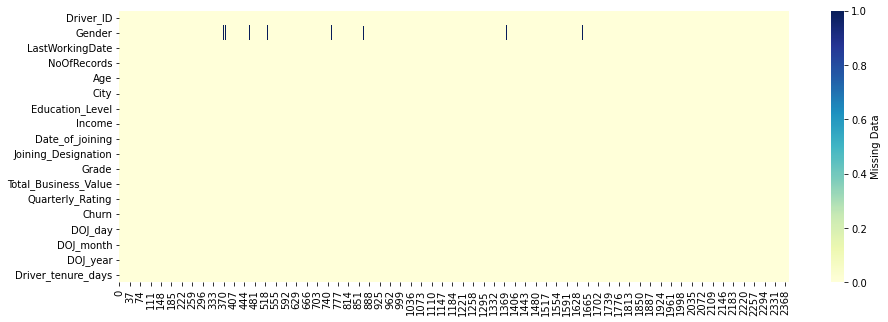

In [35]:
plt.figure(figsize=(15,5))
sns.heatmap(work_df.isna().transpose(),
            cmap="YlGnBu",
           cbar_kws={'label': 'Missing Data'})

In [36]:
# Missing Values
null_values= pd.DataFrame({"Null Values" : work_df.isna().sum(),
                           "Percentage Null Value": (work_df.isna().sum()/(work_df.shape[0])*(100))})
null_values

,Null Values,Percentage Null Value
Driver_ID,0,0.000000
Gender,45,1.889962
LastWorkingDate,0,0.000000
NoOfRecords,0,0.000000
Age,0,0.000000
City,0,0.000000
Education_Level,0,0.000000
Income,0,0.000000
Date_of_joining,0,0.000000
Joining_Designation,0,0.000000


In [37]:
# Imputing missing values of 'emp_title' with 'unknown_Emp_title'
work_df['LastWorkingDate'].fillna(0, inplace=True)

In [38]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
work_df['Gender'] = imputer.fit_transform(X=work_df['Gender'].values.reshape(-1,1), y=work_df['Churn'].values.reshape(-1,1))


In [39]:
# Missing Values
null_values= pd.DataFrame({"Null Values" : work_df.isna().sum(),
                           "Percentage Null Value": (work_df.isna().sum()/(work_df.shape[0])*(100))})
null_values

,Null Values,Percentage Null Value
Driver_ID,0,0.0
Gender,0,0.0
LastWorkingDate,0,0.0
NoOfRecords,0,0.0
Age,0,0.0
City,0,0.0
Education_Level,0,0.0
Income,0,0.0
Date_of_joining,0,0.0
Joining_Designation,0,0.0


# Exploratory Data Analysis (EDA)

### Non-Graphical Analysis

#### Unique value counts of all attributes

#### Value Counts

In [49]:
for col in work_df.columns:
    print(f"-----------------{col}------------------")
    attribute_cnt = {f'{col} Count' : work_df[col].value_counts()}
    attribute_cnt = pd.DataFrame(attribute_cnt)
    print(attribute_cnt)
    print("\n")

-----------------Driver_ID------------------
      Driver_ID Count
1                   1
1859                1
1861                1
1862                1
1863                1
...               ...
933                 1
935                 1
936                 1
937                 1
2788                1

[2381 rows x 1 columns]


-----------------Gender------------------
     Gender Count
0.0          1425
1.0           956


-----------------LastWorkingDate------------------
            LastWorkingDate Count
2021-06-01                    765
2020-07-29                     70
2019-09-22                     26
2019-03-17                     14
2020-11-28                     13
...                           ...
2019-06-16                      1
2020-11-17                      1
2020-12-05                      1
2019-09-02                      1
2020-10-28                      1

[494 rows x 1 columns]


-----------------NoOfRecords------------------
    NoOfRecords Count
5           

In [50]:
# Number of unique records for each columns
work_df.nunique()

Driver_ID               2381
Gender                     2
LastWorkingDate          494
NoOfRecords               24
Age                       36
City                      29
Education_Level            3
Income                  2339
Date_of_joining          869
Joining_Designation        5
Grade                      5
Total_Business_Value    1629
Quarterly_Rating           4
Churn                      2
DOJ_day                   31
DOJ_month                 12
DOJ_year                   8
Driver_tenure_days       928
dtype: int64

### Data categories

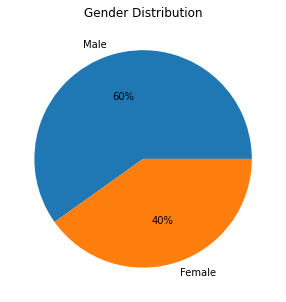

In [48]:
plt.figure(figsize=(15,5))
plt.pie(work_df['Gender'].value_counts(),labels=['Male','Female'], autopct='%.0f%%')
plt.title('Gender Distribution')
plt.show()

In [40]:
work_df['Grade'] = np.round(work_df['Grade'])
 

In [41]:
work_df['Quarterly_Rating'] = work_df['Quarterly_Rating'].round()


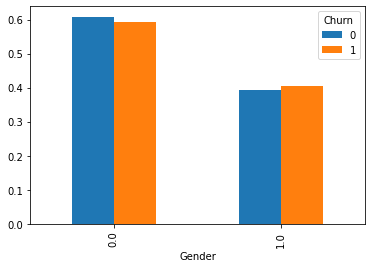

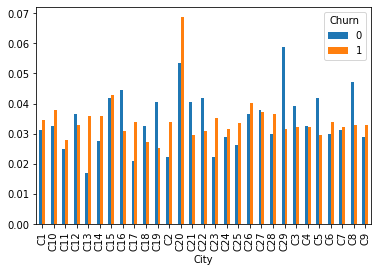

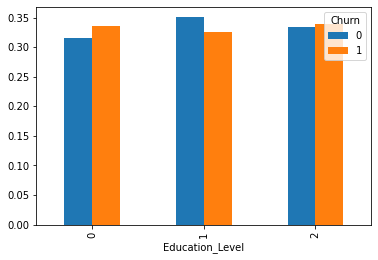

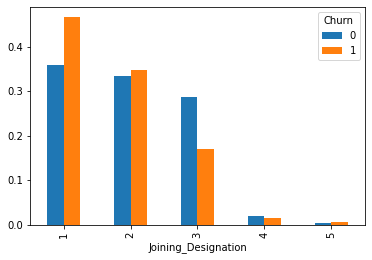

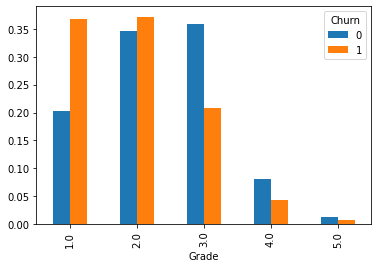

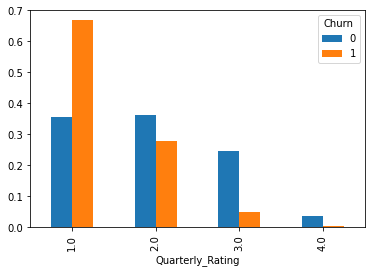

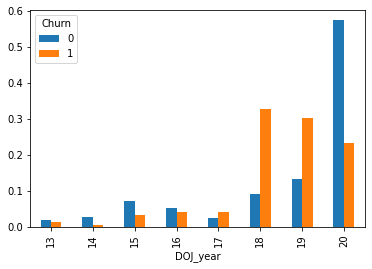

In [42]:
cat_fea = [ 'Gender', 'City', 'Education_Level', 'Joining_Designation', 'Grade', 'Quarterly_Rating', 'DOJ_year']
     

y = work_df['Churn']
for col in cat_fea:
  pd.crosstab(index=work_df[col], columns=y, normalize='columns').plot(kind='bar')

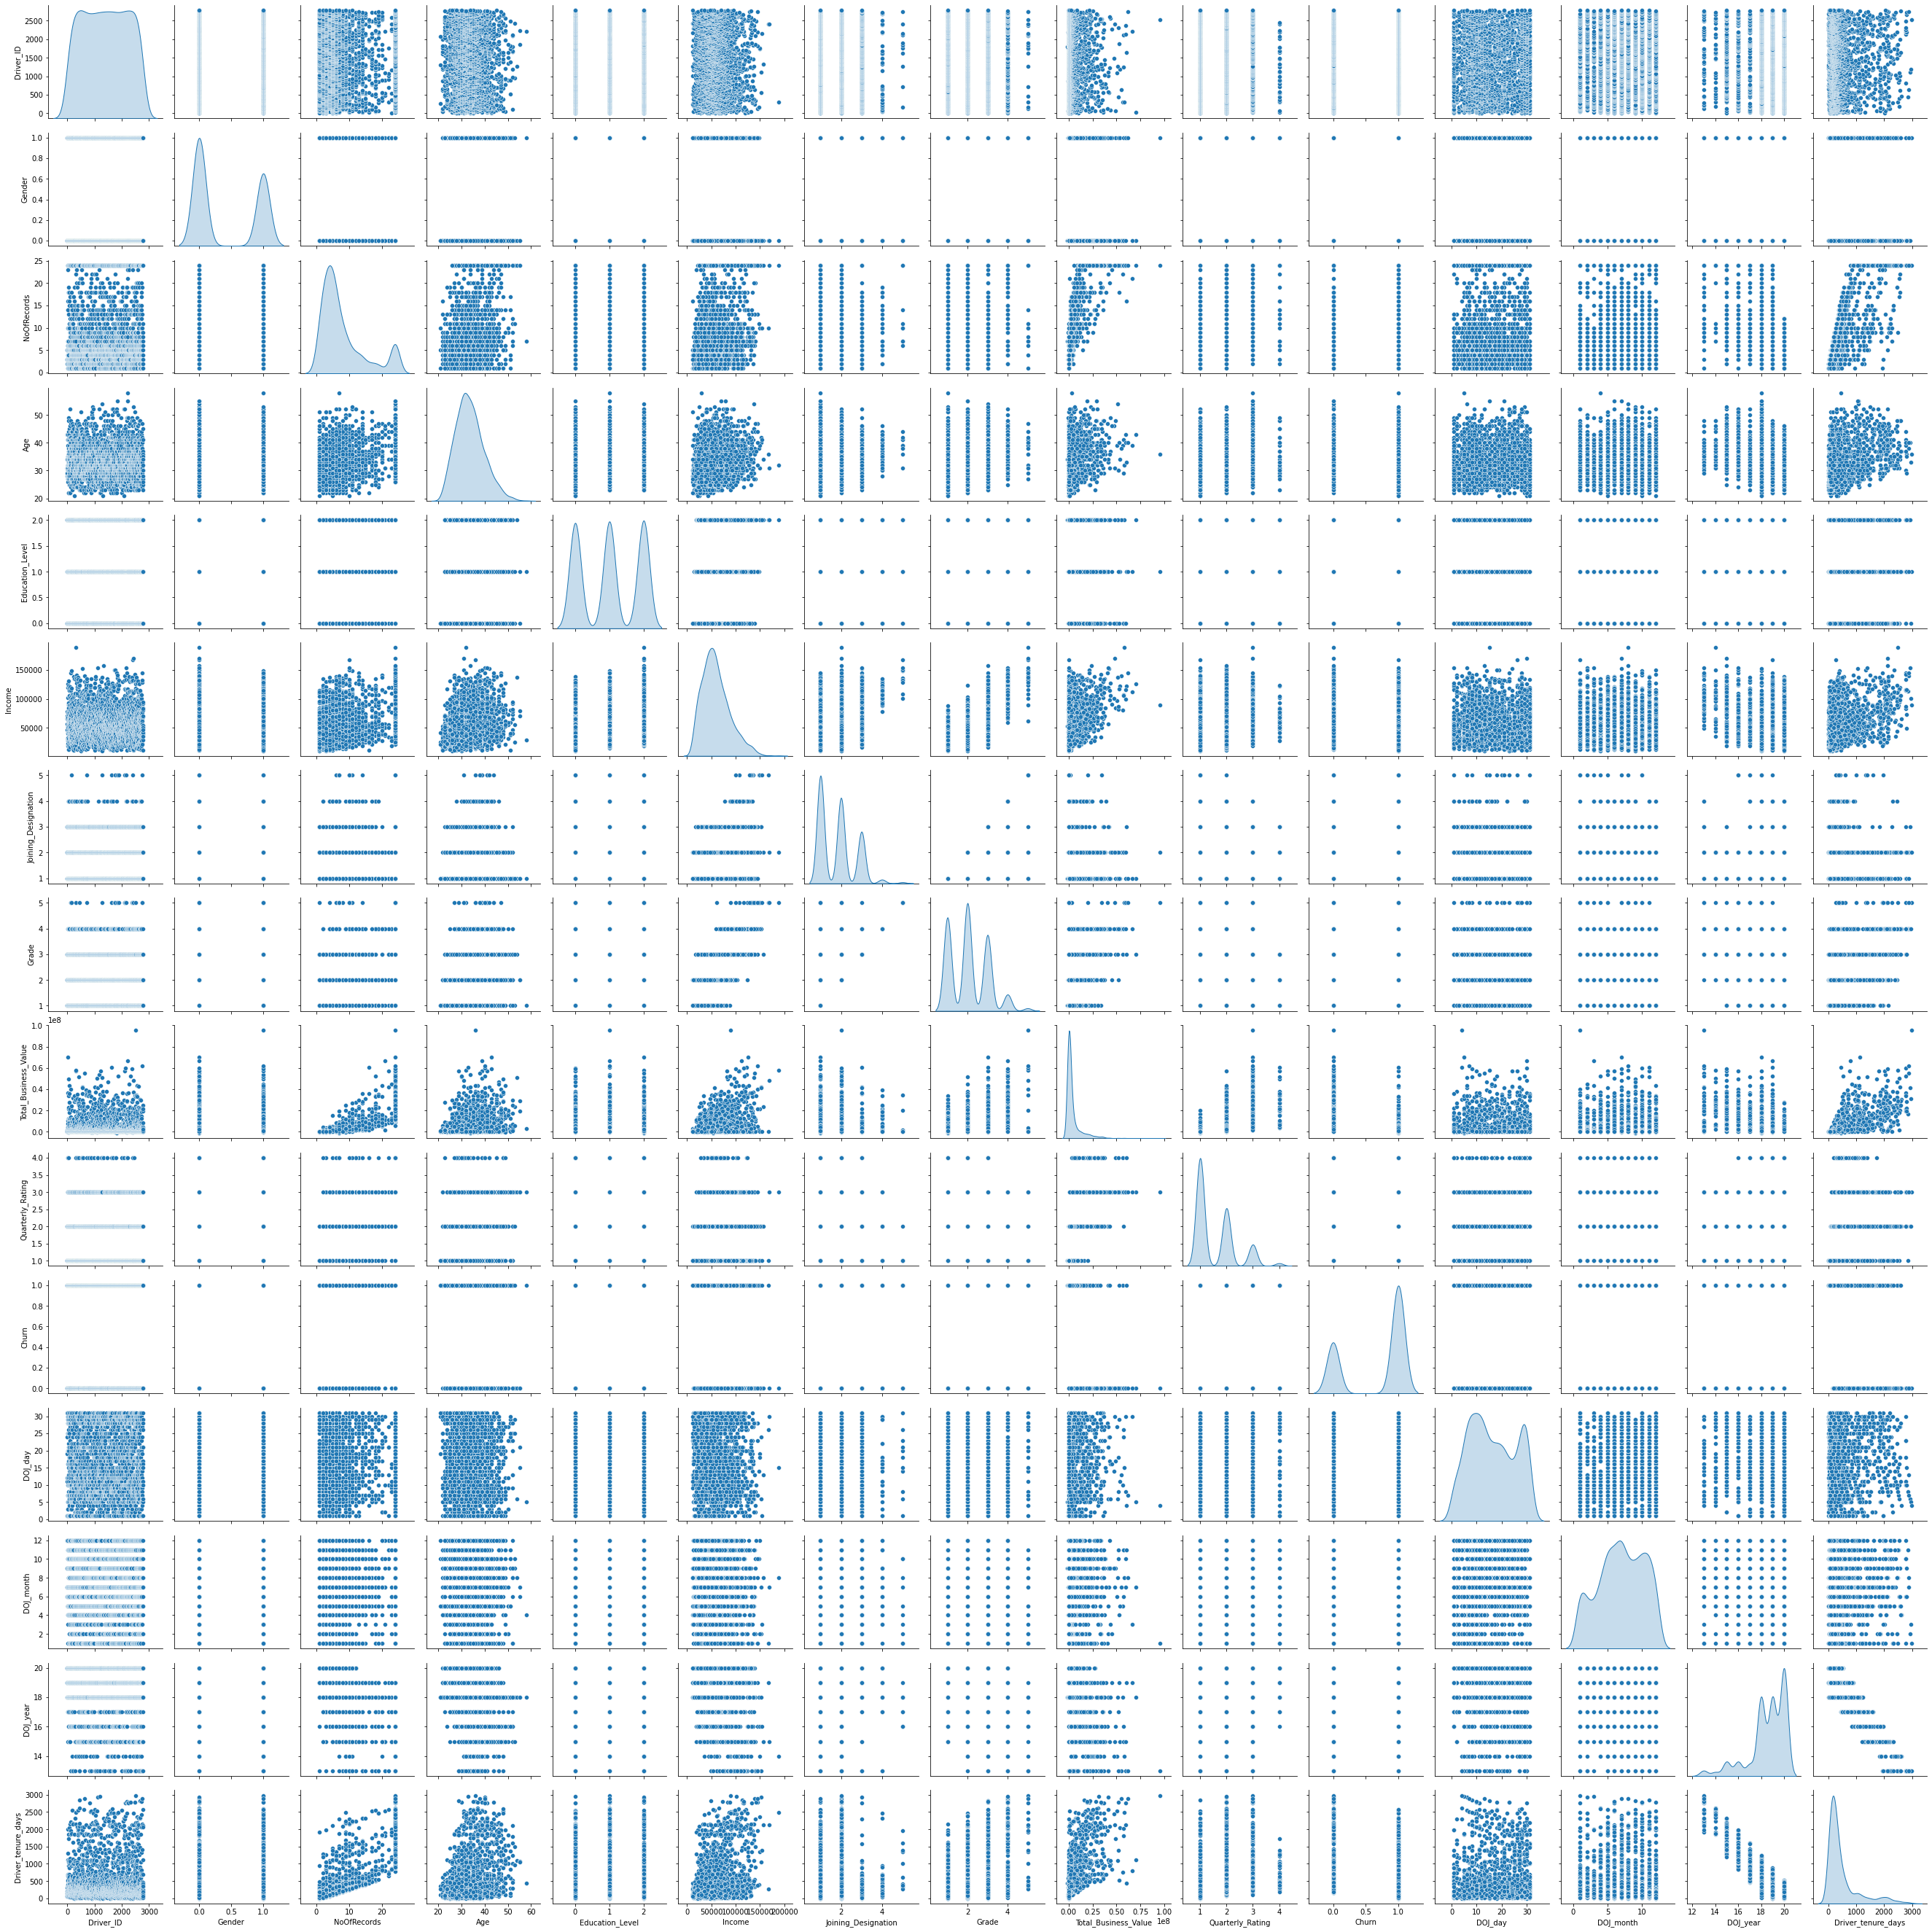

In [44]:
sns.pairplot(work_df,diag_kind="kde")

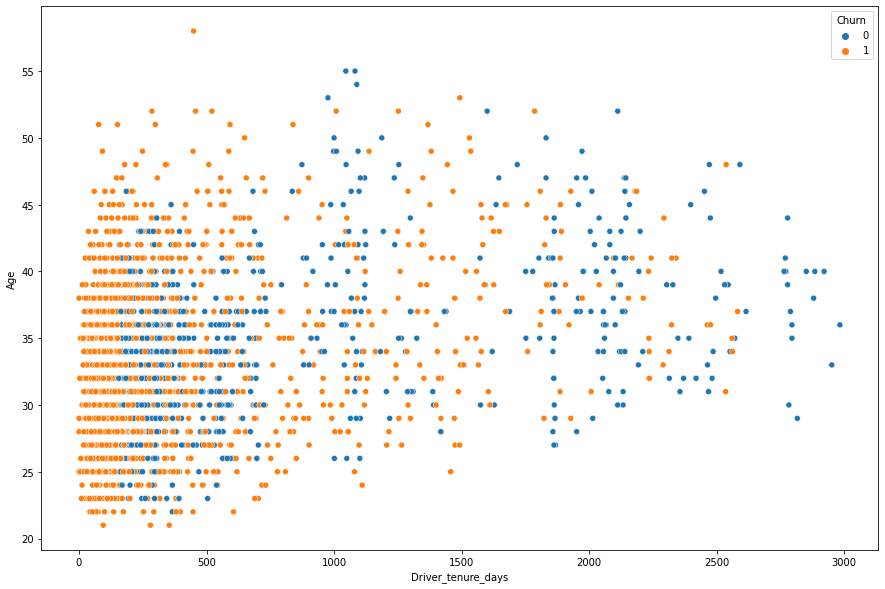

In [46]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=work_df, x="Driver_tenure_days", y="Age", hue="Churn")

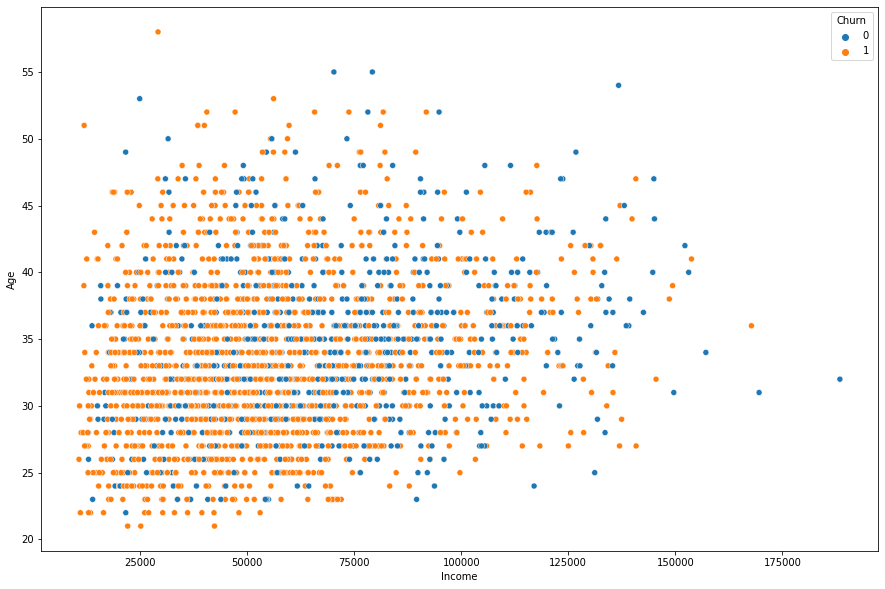

In [47]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=work_df, x="Income", y="Age", hue="Churn")

In [51]:
work_df.dtypes

Driver_ID                        int64
Gender                         float64
LastWorkingDate         datetime64[ns]
NoOfRecords                      int64
Age                            float64
City                            object
Education_Level                  int64
Income                         float64
Date_of_joining         datetime64[ns]
Joining_Designation              int64
Grade                          float64
Total_Business_Value             int64
Quarterly_Rating               float64
Churn                            int64
DOJ_day                          int64
DOJ_month                        int64
DOJ_year                         int64
Driver_tenure_days               int64
dtype: object

In [58]:
from category_encoders import TargetEncoder
     

TE = TargetEncoder()
     

work_df['City'] = TE.fit_transform(X=work_df['City'], y=work_df['Churn'])
     

work_df['DOJ_year'] = TE.fit_transform(X=work_df['DOJ_year'], y=work_df['Churn'])
          

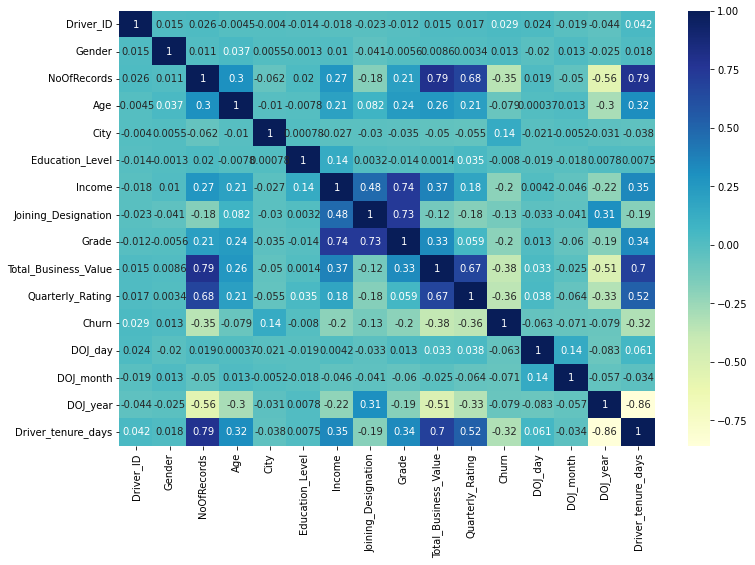

In [59]:
plt.figure(figsize=(12, 8))
sns.heatmap(work_df.corr(), annot=True, cmap="YlGnBu")
plt.show()
     

In [60]:
X = work_df.drop(['Churn'], axis=1)
y = work_df['Churn']
X.drop(X.columns[[2,8,16]], axis=1, inplace=True)
X['DOJ_day'] = pd.to_numeric(X['DOJ_day'])
X['DOJ_month'] = pd.to_numeric(X['DOJ_month'])

In [61]:
from sklearn.model_selection import train_test_split
     

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [62]:
X_train

,Driver_ID,Gender,NoOfRecords,Age,City,Education_Level,Income,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,DOJ_day,DOJ_month,DOJ_year
286,340,0.0,3,36.0,0.595377,0,33327.0,1,1.0,544560,1.0,8,8,18
1420,1669,0.0,16,22.0,0.729500,0,11068.0,1,1.0,2903650,1.0,9,8,19
1018,1199,0.0,3,25.0,0.719430,0,19245.0,1,1.0,0,1.0,28,9,20
1539,1811,0.0,24,37.0,0.706553,2,66631.0,1,2.0,18027620,3.0,30,6,17
539,623,1.0,3,23.0,0.531324,1,57931.0,1,1.0,0,1.0,11,12,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,1213,0.0,24,49.0,0.684190,2,54491.0,1,1.0,15537200,3.0,9,7,18
2121,2488,0.0,11,28.0,0.734026,0,65958.0,1,2.0,17386610,3.0,20,7,18
1424,1673,1.0,11,52.0,0.734026,2,81784.0,1,2.0,4016540,2.0,23,6,18
1725,2028,1.0,24,41.0,0.674162,2,46269.0,2,2.0,21565150,3.0,22,12,18


In [63]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [64]:
from sklearn.ensemble import RandomForestClassifier
     

RF = RandomForestClassifier(n_estimators=100, 
                            criterion='entropy',
                            max_depth=10,
                            min_samples_leaf=1,
                            min_samples_split=2,
                            min_weight_fraction_leaf=0.0,
                            max_features='sqrt',
                            max_leaf_nodes=None,
                            min_impurity_decrease=0.0,
                            bootstrap=True,
                            oob_score=False,
                            n_jobs=None,
                            random_state=None,
                            verbose=0,
                            warm_start=False,
                            class_weight='balanced',
                            ccp_alpha=0.0085,
                            max_samples=None
                            )
     

RF.fit(X_train,y_train)

RandomForestClassifier(ccp_alpha=0.0085, class_weight='balanced',
                       criterion='entropy', max_depth=10, max_features='sqrt')

In [65]:
RF.feature_importances_
     

array([8.51131398e-03, 2.01743523e-04, 2.59608945e-01, 1.55121284e-02,
       1.64782601e-02, 1.04596742e-03, 2.50028137e-02, 2.99172981e-02,
       1.62188436e-02, 1.66653699e-01, 7.92451044e-02, 3.41980629e-02,
       3.69429566e-02, 3.10462863e-01])

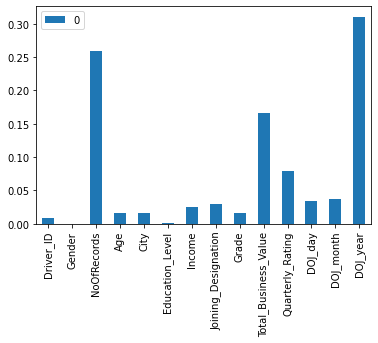

In [66]:
pd.DataFrame(data=RF.feature_importances_, index=X.columns).plot(kind='bar')
plt.show()

In [67]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
     

confusion_matrix(y_test, RF.predict(X_test))

array([[153,   9],
       [ 36, 279]])

In [68]:
confusion_matrix(y_train, RF.predict(X_train))
     

array([[ 572,   31],
       [ 133, 1168]])

In [69]:

f1_score(y_test, RF.predict(X_test)), f1_score(y_train, RF.predict(X_train))

(0.9253731343283582, 0.9344)

In [70]:
precision_score(y_test, RF.predict(X_test)), precision_score(y_train, RF.predict(X_train))
     

(0.96875, 0.9741451209341118)

In [71]:
recall_score(y_test, RF.predict(X_test)), recall_score(y_train, RF.predict(X_train))

(0.8857142857142857, 0.897770945426595)

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
     


In [73]:

params = {'max_depth': [7,10,15],
          'n_estimators': [100, 200, 300, 400],
          'max_features': [4, 7, 10],
          'ccp_alpha': [0.0005, 0.00075, 0.001]
          }
     



In [74]:
RFC = RandomForestClassifier()
grid_search = GridSearchCV(
    estimator = RFC,
    param_grid = params,
    scoring = 'accuracy',
    n_jobs = -1, 
    refit = True,
    cv = 3, 
    pre_dispatch = '2*n_jobs',
    return_train_score = False
)


In [75]:

grid_search.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.0005, 0.00075, 0.001],
                         'max_depth': [7, 10, 15], 'max_features': [4, 7, 10],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy')

In [76]:
grid_search.best_estimator_

RandomForestClassifier(ccp_alpha=0.001, max_depth=10, max_features=10,
                       n_estimators=200)

In [77]:

grid_search.best_score_


0.9212234117423019

In [78]:
grid_search.best_params_
     

{'ccp_alpha': 0.001, 'max_depth': 10, 'max_features': 10, 'n_estimators': 200}

In [79]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100,
                           criterion='entropy',
                          max_depth = 7,
                          min_samples_split = 2, 
                          min_samples_leaf = 1, 

                          class_weight = 'balanced',
                          ccp_alpha = 0.0001,
                          max_samples = None 
                            )
     

RF.fit(X_train, y_train)

RandomForestClassifier(ccp_alpha=0.0001, class_weight='balanced',
                       criterion='entropy', max_depth=7)

In [80]:
RF.score(X_train, y_train), RF.score(X_test, y_test)

(0.9296218487394958, 0.909853249475891)

In [81]:
y_test_pred = RF.predict(X_test)
y_train_pred = RF.predict(X_train)


In [82]:
f1_score(y_test, y_test_pred), f1_score(y_train, y_train_pred)


(0.930081300813008, 0.9470355731225296)

In [83]:

precision_score(y_test, y_test_pred), precision_score(y_train, y_train_pred)

(0.9533333333333334, 0.9747762408462164)

In [84]:


recall_score(y_test, y_test_pred), recall_score(y_train, y_train_pred)

(0.9079365079365079, 0.9208301306687163)

test


In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
     

bagging_classifier_model = BaggingClassifier(base_estimator= DecisionTreeClassifier(max_depth=7, class_weight='balanced'),
                                             n_estimators=50,
                                             max_samples=1.0,
                                             max_features=1.0, 
                                             bootstrap=True,
                                             bootstrap_features=False,
                                             oob_score=False,
                                             warm_start = False,
                                             n_jobs = None, 
                                             random_state = None, 
                                             verbose = 0,
                                             )
     

bagging_classifier_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                        max_depth=7),
                  n_estimators=50)

In [86]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
     

y_test_pred = bagging_classifier_model.predict(X_test)
y_train_pred = bagging_classifier_model.predict(X_train)
     

confusion_matrix(y_test, y_test_pred)

array([[151,  11],
       [ 29, 286]])

In [87]:
confusion_matrix(y_train, y_train_pred)

array([[ 584,   19],
       [  81, 1220]])

In [88]:

f1_score(y_test, y_test_pred), f1_score(y_train, y_train_pred)


(0.9346405228758169, 0.9606299212598425)

In [89]:

precision_score(y_test, y_test_pred), precision_score(y_train, y_train_pred)


(0.9629629629629629, 0.9846650524616626)

In [90]:
     
recall_score(y_test, y_test_pred), recall_score(y_train, y_train_pred)

(0.9079365079365079, 0.9377401998462721)

In [91]:
bagging_classifier_model.score(X_test, y_test)


0.9161425576519916

In [92]:

bagging_classifier_model.score(X_train, y_train)


0.9474789915966386

In [93]:
     
from xgboost import XGBClassifier
     

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {'max_depth': [2, 4, 6, 10],
          'n_estimators': [100, 200, 300, 400]
          }

grid_search = GridSearchCV(
    estimator = XGBClassifier(), 
    param_grid = params, 
    scoring = 'accuracy',
    n_jobs = -1, 
    refit = True, 
    cv = 3, 
    pre_dispatch = '2*n_jobs',
    return_train_score=False
)

grid_search.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 10],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy')

In [94]:
grid_search.best_estimator_
     

XGBClassifier(max_depth=6, n_estimators=200)

In [95]:
grid_search.best_score_


0.9212176159368092

In [96]:

grid_search.best_params_


{'max_depth': 6, 'n_estimators': 200}

In [97]:

xgb = XGBClassifier(n_estimators=100, max_depth=2)
xgb.fit(X_train, y_train)

XGBClassifier(max_depth=2)

In [98]:
X_train.dtype

dtype('float64')

In [99]:
y_test_pred = xgb.predict(X_test)
y_train_pred = xgb.predict(X_train)

In [100]:
  

confusion_matrix(y_test, y_test_pred)

array([[136,  26],
       [ 22, 293]])

In [101]:
confusion_matrix(y_train, y_train_pred)


array([[ 539,   64],
       [  80, 1221]])

In [102]:

xgb.score(X_train, y_train), xgb.score(X_test, y_test)


(0.9243697478991597, 0.89937106918239)

In [103]:
f1_score(y_test, y_test_pred), f1_score(y_train, y_train_pred)


(0.9242902208201893, 0.9443155452436195)

### Graphical Analysis

In [104]:
recall_score(y_test, y_test_pred), recall_score(y_train, y_train_pred)


(0.9301587301587302, 0.9385088393543428)

In [105]:
precision_score(y_test, y_test_pred), precision_score(y_train, y_train_pred)


(0.9184952978056427, 0.9501945525291828)

In [106]:

xgb.feature_importances_

array([0.01108378, 0.        , 0.19097157, 0.00842844, 0.02660423,
       0.        , 0.01902414, 0.02243521, 0.00647438, 0.09210021,
       0.27529535, 0.0519153 , 0.06947815, 0.22618926], dtype=float32)

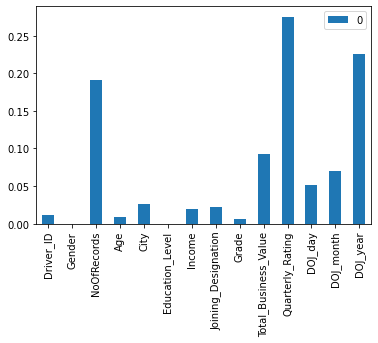

In [107]:
pd.DataFrame(data=xgb.feature_importances_, index=X.columns).plot(kind='bar')

In [108]:
def GradientBoostClassifier(X, y):
  from sklearn.ensemble import GradientBoostingClassifier
  from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, auc, recall_score, precision_score
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

  gbs_cl = GradientBoostingClassifier()
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)

  gbs_cl.fit(X_train, y_train)
  y_pred = gbs_cl.predict(X_test)
  prob = gbs_cl.predict_proba(X_test)
  cm = confusion_matrix(y_test, y_pred)

  print("Train Score:", gbs_cl.score(X_train, y_train), '\n')
  print("Test Score:", gbs_cl.score(X_test, y_test), '\n')
  print("Accuracy Score:", accuracy_score(y_test, y_pred), '\n')
  print(cm, "\n\n *** Confusion Matrix ***", '\n')
  print("ROC-AUC Score Test Dataset:", roc_auc_score(y_test, prob[:, 1]), '\n')
  print("Precision Score Test Dataset:", precision_score(y_test, y_pred), '\n')
  print("Recall Score Test Dataset:", recall_score(y_test, y_pred), '\n')
  print("F1 Scorre Test Dataset:", f1_score(y_test, y_pred), '\n')

  return (prob[:,1], y_test)
     

In [109]:

probs, y_test = GradientBoostClassifier(X, y)

Train Score: 0.9501050420168067 

Test Score: 0.9140461215932913 

Accuracy Score: 0.9140461215932913 

[[132  16]
 [ 25 304]] 

 *** Confusion Matrix *** 

ROC-AUC Score Test Dataset: 0.9614104986445411 

Precision Score Test Dataset: 0.95 

Recall Score Test Dataset: 0.9240121580547113 

F1 Scorre Test Dataset: 0.9368258859784284 



In [110]:
def plot_pre_curve(y_test, probs):
  from sklearn.metrics import precision_recall_curve
  precision, recall, thresholds = precision_recall_curve(y_test, probs)
  plt.plot([0, 1], [0.5, 0.5], linestyle='--')
  plt.plot(recall, precision, marker='.')
  plt.title("Precision Recall Curve")
  plt.xlabel('Recall')
  plt.ylabel("Precision")
  plt.show()
     

def plot_roc(y_test, prob):
  from sklearn.metrics import roc_curve
  fpr, tpr, thresholds = roc_curve(y_test, probs)
  plt.plot([0, 1], [0,1], linestyle='--')
  plt.plot(fpr, tpr, marker='.')
  plt.title("ROC Curve")
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.show()

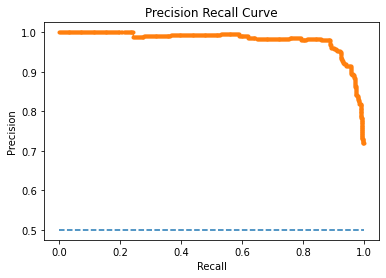

In [111]:

plot_pre_curve(y_test, probs)
     

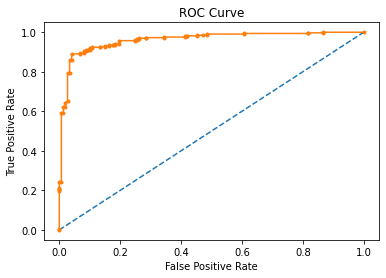

In [112]:
plot_roc(y_test, probs)
     

## Model Results:
### Random Forest:
* Train Score - 0.8634453781512605
* Test Score - 0.8679245283018868
* Precision - 0.95
* Recall - 0.83
* f1 Score - 0.89
* Feature Importance - Joining Year, No. of Records and Total Business Value
### GridSearch on RF:
* RF Best Score - 0.90
* Precision - 0.92
* Recall - 0.89
* f1 Score - 0.90
* Bagging Classifier:
* Train Score - 0.91
* Test Score - 0.87
* Precision - 0.93
* Recall - 0.87
* f1 Score - 0.89
* Accuracy Score - 0.87
### XGBoost:
* Train Score - 0.88
* Test Score - 0.89
* Precision - 0.87
* Recall - 0.94
* f1 Score - 0.90
* Feature Importance - Joining Year, Quarterly Rating, and No. of Records
### GBDC:
* Train Score - 0.914390756302521
* Test Score - 0.8909853249475891
* Precision - 0.92
* Recall - 0.91
* f1 Score - 0.92
* Accuracy Score - 0.89
* ROC-AUC Score - 0.95
## Insights & Recommendations:
Based on the EDA, and predictions from the above models, we can derive below insights & recommendations:

* Churn distribution is 68% (1) vs 32% (0)
* Though the Male drivers are high in numbers, in terms of churn, Female drivers are slightly higher than male drivers,
* Churn probability is higher at Education Level 0, 1 and 2,
High churn is observed where,
* a. income is not increased b. for the City C20 c. Joining designation 1 and 2 * d. Grades 1 and 2 e. for those with lower quarterly rating f. for those who joined in 2018 and 2019
###Recommendations:
To minimize the churn Ola can consider the following:

* Try to attract drivers from the cities where high churn is observed with higher income/situtional offerings/high commissions, etc.,
* can increase the designations based on the performance of the drivers regularly,
Similarly grade upgrade to be considered,
* Should re-look at the quarterly rating strategy and try to
motivate those with lower quarterly ratings
* Must need to look into the hirings b/w 2018 to 2020 and fix the gaps as this is the period has higher churn rate
* Extra incentives can be offered to retain those made good monthly business and
* Special incentive schemes can be initiated for those who serve long term service.


#### Univariate Analysis

# Observations & Insights



*   There is no missing or duplicate value in the given dataset
*   Age 18 & 19 have more patients and the rest of the ages have equal distribution
*   Interestingly Non-Smoker patients count is more than the Smokers count
*   Southeast region has more patients and the rest of the regions have equal distribution
*   Good to see less number of patients with 'Severity Level' high
*   There are outliers in 'viral load' and 'hospitalization charges' columns
*   There is a high correlatioin b/w Age & Hospitalization Charges. As the age increases, hospitalization charges also increases
*   Also, hospitalization seem to increase with the age, and more specifically for women   
*   Female patients seems to be little more vulnerable to viral load than Male patients
*   Incidently non-smokers tend to have high viral load than smokers
*   Amongst regions, Southeast is impacted high viral load than other regions
*   Male patients tend to incur high charges
*   Evidently Smokers are paying more than the non-smokers
*   Southeast region has higher hospitalization charges amongst regions
*   Hospitalization charges increase with age and that too in women segment

**Observations from Hypothesis Testing:**

*   Hospitalization Charges for smokers is higher than for non-smokers
*   Viral Load in Females is more compared to Males
*   Proportion of smoking is almost similar across the regions
*   Viral Load of women with Severity levels - 0,1,2 are more or less same




# Recommendations

Based on the above observations and insights, some of the recommendations to consider are: 
*   It is alarming to see high number of patients at lower age group 18-20. It's high time to role out stable nutrition programs for children & teens.
*   Notably Southeast region is impacted with high viral load and increased hospitalization charges. Special attention needs to be given in this region
*   As age has direct proportion to the increased hospitalization charges, Apollo can come up with targeted healthcare policy & programs for higher age groups
*   Female gender group requires specific, focused attention 
*   Special medi-claim policy can be launced for Smokers 